# Summary Stats for Processed AFT Dataset
**Author:** Jim Maddock

**Last Updated:** 5-7-20

**Description:** Summary stats for the processed AFT Dataset.  Currently ***preliminary*** stats due to processing errors.  This notebook should:
* Vandalism
    * determine distribution of vandalism classifications
    * compare vandalism classifications to helpful/unhelpful classes
* Determine distribution of topic classes

In [1]:
import pandas as pd
import numpy as np
import uuid
import logging
import os
import random

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
# import dataset from csv
BASE_FILE_PATH = '/srv/aft/processed/chunks/'

dtypes = {
    'aft_id':object
}

file_list = os.listdir(BASE_FILE_PATH)
processed_df = pd.DataFrame()
for file in file_list:
    file_path = os.path.join(BASE_FILE_PATH,file)
    chunk = pd.read_csv(file_path,escapechar='\\', encoding='latin-1', dtype=dtypes)
    processed_df = processed_df.append(chunk)


In [27]:
processed_df.groupby('dq_pred').size().to_frame('count').sort_values('count')

,count
dq_pred,
attack,4438
OK,6314
spam,8451
vandalism,91343


In [6]:
processed_df['sign_helpful'] = processed_df['aft_net_helpful'].apply(np.sign)

In [25]:
processed_df.groupby(['dq_pred','sign_helpful']).size().to_frame('count').sort_values('count')

count
dq_pred   sign_helpful       
attack     0.0            347
OK         0.0            505
spam       0.0            686
attack     1.0           1516
          -1.0           2575
OK        -1.0           2852
           1.0           2957
spam      -1.0           3720
           1.0           4045
vandalism  0.0           7391
           1.0          34655
          -1.0          49297

In [31]:
SAMPLE_SIZE = 100
OUTPUT_FILE = '/srv/aft/processed/samples/vandalism_check_5-8-20.csv'

def createVandalismSample(df, sample_size, output_file):
    cols = ['UUID','sign_helpful','dq_pred','aft_comment','dq_prob_OK','dq_prob_attack','dq_prob_spam','dq_prob_vandalism']
    sample_df = processed_df.groupby(['dq_pred','sign_helpful']).apply(lambda x: x.sample(sample_size))
    sample_df = sample_df[cols]
    sample_df.to_csv(output_file,index=False)
    
createVandalismSample(processed_df, sample_size=SAMPLE_SIZE, output_file=OUTPUT_FILE)

In [26]:
processed_df.groupby('dt_pred').size().to_frame('count').sort_values('count')

,count
dt_pred,
"('Geography.Regions.Africa.Eastern Africa',)",1
"('Culture.Media.Video games',)",2
"('Geography.Regions.Asia.Central Asia',)",4
"('STEM.Technology',)",4
"('Geography.Regions.Asia.South Asia',)",8
...,...
"('Geography.Regions.Asia.Asia*',)",6342
"('Culture.Literature',)",7734
"('Culture.Internet culture',)",8237


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97e3ebb70>]],
      dtype=object)

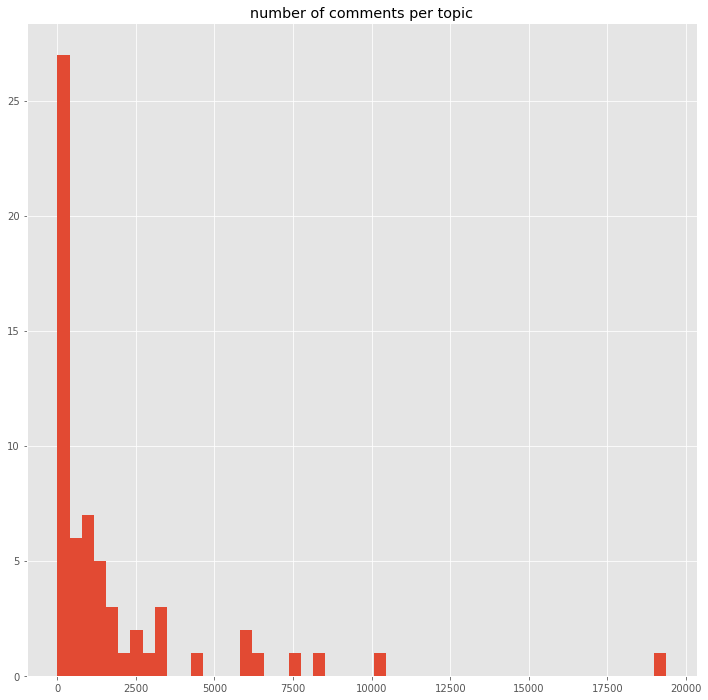

In [36]:
processed_df.groupby('dt_pred').size().to_frame('number of comments per topic').hist(bins=50,figsize=(12,12))

In [55]:
processed_df['dt_pred'].apply(lambda x: str(x).replace('(\'','').split('.')[0]).to_frame('count').groupby('count').size()

count
Culture                61782
Geography              20760
History and Society     6755
STEM                   23131
nan                     2555
dtype: int64

['Culture', 'Biography', 'Biography']